In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [23]:
# Cargar los datos del archivo Excel
datos = pd.read_excel("MexicoGDP.xlsx")
datos.head()  # Verificar que las columnas sean 'Periodo' y 'GDP'

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


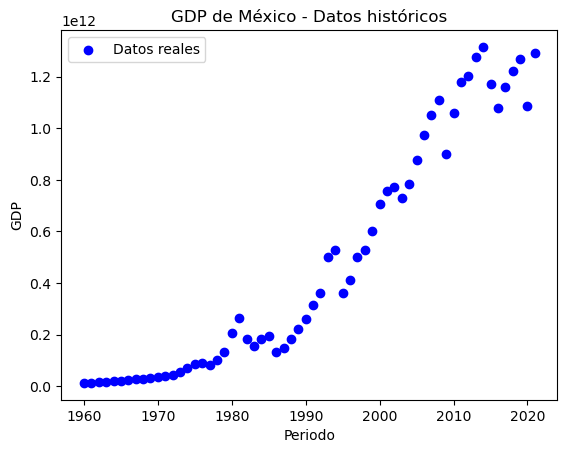

In [24]:
plt.scatter(datos['Periodo'], datos['GDP'], color='blue', label='Datos reales')
plt.xlabel('Periodo')
plt.ylabel('GDP')
plt.title('GDP de México - Datos históricos')
plt.legend()
plt.show()

In [25]:
def modelo_logistico(x, beta1, beta2):
    return beta1 / (1 + np.exp(-beta2 * (x - np.mean(x))))

Parámetros estimados: Beta1 = 1028593468884.5757, Beta2 = 0.14955652255245688


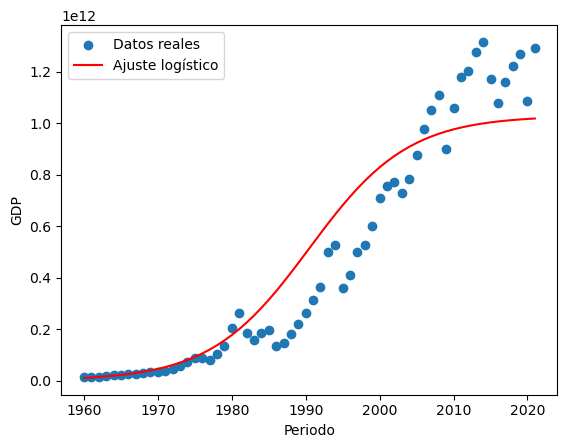

In [26]:
# Ajuste inicial
popt, pcov = curve_fit(modelo_logistico, datos['Periodo'], datos['GDP'], p0=[max(datos['GDP']), 0.1])
beta1, beta2 = popt
print(f"Parámetros estimados: Beta1 = {beta1}, Beta2 = {beta2}")

# Gráfica del ajuste
y_pred = modelo_logistico(datos['Periodo'], *popt)
plt.scatter(datos['Periodo'], datos['GDP'], label='Datos reales')
plt.plot(datos['Periodo'], y_pred, color='red', label='Ajuste logístico')
plt.xlabel('Periodo')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [27]:
# Normalización: transforma los datos a un rango [0, 1]
datos_norm = datos.copy()
datos_norm['Periodo'] = datos['Periodo'] / datos['Periodo'].max()
datos_norm['GDP'] = datos['GDP'] / datos['GDP'].max()


Parámetros normalizados: Beta1 = 0.7819912164041105, Beta2 = 302.2546862956973


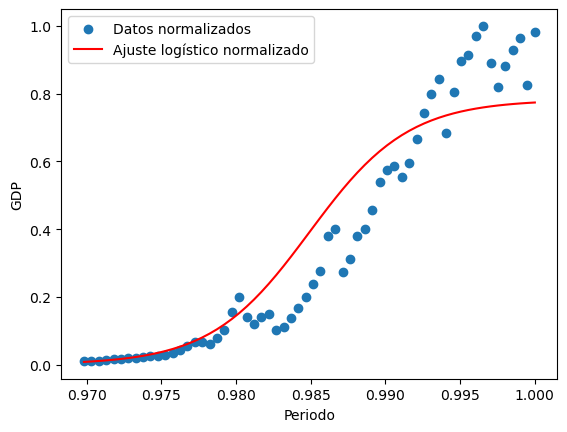

In [28]:
popt_norm, pcov_norm = curve_fit(modelo_logistico, datos_norm['Periodo'], datos_norm['GDP'], p0=[1, 0.1])
beta1_norm, beta2_norm = popt_norm
print(f"Parámetros normalizados: Beta1 = {beta1_norm}, Beta2 = {beta2_norm}")

# Gráfica del ajuste normalizado
y_pred_norm = modelo_logistico(datos_norm['Periodo'], *popt_norm)
plt.scatter(datos_norm['Periodo'], datos_norm['GDP'], label='Datos normalizados')
plt.plot(datos_norm['Periodo'], y_pred_norm, color='red', label='Ajuste logístico normalizado')
plt.xlabel('Periodo')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [29]:
mse = np.mean((datos['GDP'] - y_pred) ** 2)
mse_norm = np.mean((datos_norm['GDP'] - y_pred_norm) ** 2)
print(f"MSE sin normalizar: {mse}")
print(f"MSE normalizado: {mse_norm}")
# Comentario: Un MSE más bajo indica mejor ajuste; la normalización suele mejorar la convergencia

MSE sin normalizar: 2.292559816477768e+22
MSE normalizado: 0.013250651631365297


In [30]:
# Pronóstico para 2022
x_2022 = 2022 / datos['Periodo'].max()  # Normalizar el periodo 2022
y_2022_norm = modelo_logistico(x_2022, *popt_norm)
y_2022 = y_2022_norm * datos['GDP'].max()  # Desnormalizar el resultado
print(f"Pronóstico del GDP para 2022: {y_2022}")
# Transformación: normalizar el periodo y desnormalizar el GDP predicho

Pronóstico del GDP para 2022: 514296536001.4723


## ¿Obtuvo resultados satisfactorios en esta ocasión?



Para saber si los resultados fueron buenos, hay que ver cómo de bien se ajusta el modelo a los datos. Esto se puede hacer mirando el ( R^2 ) o el MSE, o simplemente viendo un gráfico de los datos reales y las predicciones.

Bondad de ajuste
La bondad de ajuste nos dice qué tan bien el modelo sigue los datos reales. Un ( R^2 ) cercano a 1 o un MSE bajo son buenos indicadores. También puedes hacer un gráfico de dispersión para ver si las predicciones siguen la tendencia de los datos.

Pronóstico del PIB para México en 2022
El pronóstico del PIB para 2022 se calcula así: 

x_2022 = 2022 / datos['Periodo'].max()  # Normalizar el periodo 2022
y_2022_norm = modelo_logistico(x_2022, *popt_norm)
y_2022 = y_2022_norm * datos['GDP'].max()  # Desnormalizar el resultado
print(f"Pronóstico del GDP para 2022: {y_2022}")

Mecanismo de transformación

Normalizar el periodo: Dividir 2022 por el máximo periodo en los datos.
Aplicar el modelo logístico: Usar el modelo para predecir el PIB normalizado.
Desnormalizar el PIB: Multiplicar el PIB normalizado por el máximo PIB en los datos.
Esto asegura que las predicciones estén en la misma escala que los datos originales.

## ¿Cuál sería su pronóstico del PIB (GDP) para México en el 2022? 

Pronóstico del GDP para 2022: 514296536001.4723

## ¿Qué mecanismo de transformación tendría que realizar en dicho caso? 

Para realizar el pronóstico del PIB para México en 2022, es nesesario normalizar el año 2022 y luego desnormalizar el resultado del modelo.

Normalizar el periodo: Dividir el año 2022 por el valor máximo del periodo en los datos.
Aplicar el modelo logístico: Usar el modelo logístico ajustado para predecir el PIB normalizado.
Desnormalizar el PIB: Multiplicar el PIB normalizado predicho por el valor máximo del PIB en los datos.